# Importing libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
# Defining Path

path = r'/Users/medhavi/Desktop/Jinal/EXERCISE 4/Instacart Basket Analysis 19.06'
path

'/Users/medhavi/Desktop/Jinal/EXERCISE 4/Instacart Basket Analysis 19.06'

In [3]:
# Importing orders_products_merged_grouping.pkl dataframe
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

In [4]:
# Importing orders_products_merged_grouping.pkl dataframe
ords_prods_group = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated_2.pkl'))

In [5]:
# Checking Imported Dataframe
df_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
#  Checking the size
df_cust_merge.shape

(32434212, 30)

In [7]:
# Checking the column titles
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  max_order               int64   
 16  loyalty_flag            object  
 17  average_price           float64 
 18  spending_flag           object  
 19  median_prior_orders     float64 
 20  order_frequency_flag    object  
 21  First 

# dropping columns

In [11]:

# dropping first and last name columns due to PII
df_cust_merge = df_cust_merge.drop(columns = ['First Name'])

In [12]:

# dropping first and last name columns due to PII
df_cust_merge = df_cust_merge.drop(columns = ['Last Name'])

In [13]:
# checking dropped columns
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 28 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  max_order               int64   
 16  loyalty_flag            object  
 17  average_price           float64 
 18  spending_flag           object  
 19  median_prior_orders     float64 
 20  order_frequency_flag    object  
 21  Gender

# Creating a region flag

In [14]:
# making a group/list of southern states
states_south = ['Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
# making a group/list of ne states
states_ne = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [16]:
# checking the list
states_ne

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [17]:
states_south

['Deleware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Mississippi',
 'Alabama',
 'Oklahoma',
 'Texas',
 'Arkansas',
 'Louisiana']

In [18]:
# making a group/list of weatern states
states_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [19]:
# making a group/list of midwest states
states_mw = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [25]:
# using loc function to make a new region column
df_cust_merge.loc[df_cust_merge['State'].isin(states_south), 'region'] = 'South'

In [27]:
# using loc function to make a new region column
df_cust_merge.loc[df_cust_merge['State'].isin(states_ne), 'region'] = 'Northeast'

In [29]:
# using loc function to make a new region column
df_cust_merge.loc[df_cust_merge['State'].isin(states_mw), 'region'] = 'Midwest'

In [30]:
# using loc function to make a new region colum
df_cust_merge.loc[df_cust_merge['State'].isin(states_west), 'region'] = 'West'

In [31]:
# checking output
df_cust_merge.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,prior,7,1,9,20.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [32]:
# checking to see what the spending habits look like across regions
crosstab = pd.crosstab(df_cust_merge['region'], df_cust_merge['spending_flag'], dropna = False)

In [33]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,156308,7447502
Northeast,108363,5619984
South,193901,9970262
West,160931,8139514


In [ ]:
# The south seems to have the most customers.

# making an exclusion flag for customers under 5 max orders

In [34]:
#checking column names
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  max_order               int64   
 16  loyalty_flag            object  
 17  average_price           float64 
 18  spending_flag           object  
 19  median_prior_orders     float64 
 20  order_frequency_flag    object  
 21  Gender

In [35]:
# making a flag for people who order less than 5 times
df_cust_merge['exclusion_flag'] = df_cust_merge['max_order'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [36]:
# checking the columns
df_cust_merge.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,No


In [37]:
# making subset df excluding low activity customers
df_low_activity_excluded = df_cust_merge[df_cust_merge['exclusion_flag']== 'No']

In [38]:
# checking the count for the exclusion flag
df_cust_merge['exclusion_flag'].value_counts(dropna = False)

No     30992664
Yes     1441548
Name: exclusion_flag, dtype: int64

In [39]:
# seeing if the number matches in the new subset df
df_low_activity_excluded.shape

(30992664, 30)

In [40]:
# Export new data set to pkl

df_low_activity_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# creating an age flag

In [48]:
# creating an age flag
df_cust_merge.loc[df_cust_merge['Age']>65,'age_flag'] = 'Senior'

In [56]:
# creating an age flag
df_cust_merge.loc[(df_cust_merge['Age']<=65) & (df_cust_merge['Age']>44),'age_flag'] = 'Middle Age'

In [58]:
# creating an age flag
df_cust_merge.loc[df_cust_merge['Age']<=45,'age_flag'] = 'Young Adult'

In [59]:
#checking count
df_cust_merge['age_flag'].value_counts(dropna = False)

Young Adult    14213977
Middle Age     10125017
Senior          8095218
Name: age_flag, dtype: int64

# Visualization

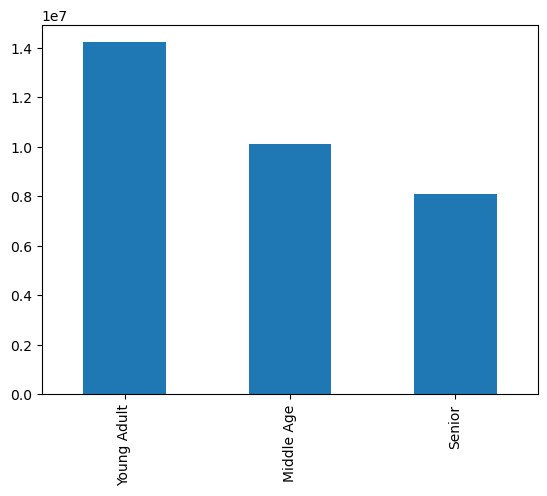

In [60]:
# bar chart showing customers by age bracket
bar_age = df_cust_merge['age_flag'].value_counts().plot.bar()

In [62]:
# saving bar chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age.png'))

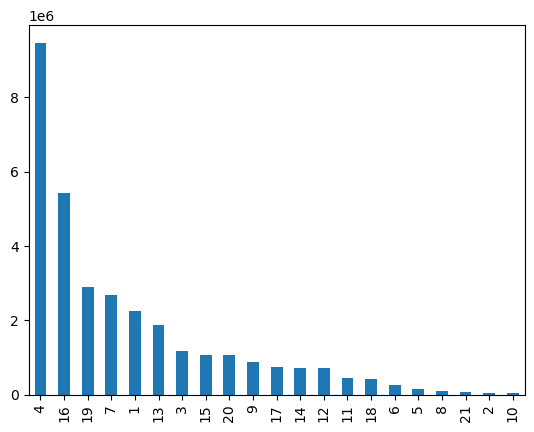

In [63]:
# bar chart for dept _id purchases
bar_dept = df_cust_merge['department_id'].value_counts().plot.bar()

In [64]:
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [65]:
department_counts = df_cust_merge['department_id'].value_counts()

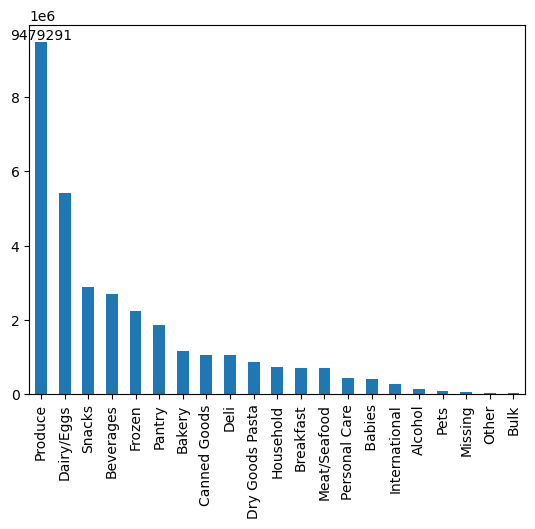

In [66]:
ax = department_counts.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [67]:
# saving bar chart for dept
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dept.png'))

In [68]:
# multi bar chart of dept and region
region_department_counts = df_cust_merge.groupby(['department_id','region']).size().unstack(fill_value=0)

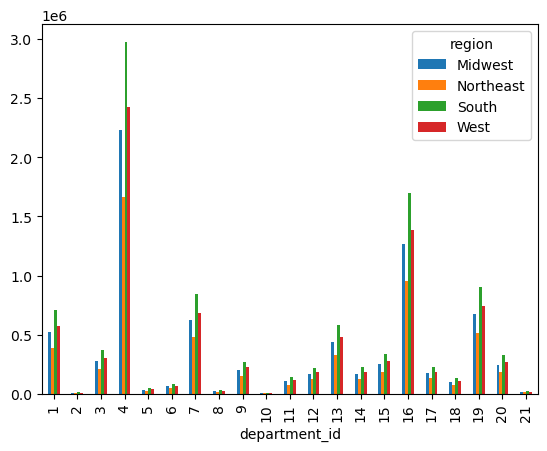

In [69]:
# multi bar chart for region and dept
reg_dept = region_department_counts.plot.bar(stacked=False)


In [70]:
# saving bar chart for reg and dept
reg_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_reg_dept.png'))

In [71]:
# bar chart of dept and loyalty
loyalty_department_counts = df_cust_merge.groupby(['department_id','loyalty_flag']).size().unstack(fill_value=0)

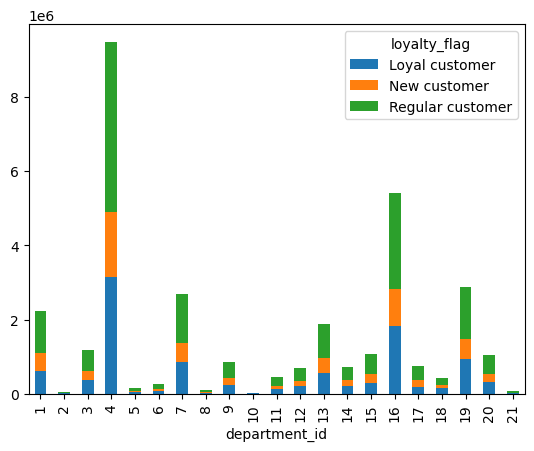

In [72]:
# stacked bar chart for loyalty and dept
loyal_dept = loyalty_department_counts.plot.bar(stacked=True)

In [73]:
# saving bar chart for loyalty and dept
loyal_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_loyal_dept.png'))

In [ ]:
# Loyalty Status

In [74]:
# grouping age and loyalty
age_loyalty_counts = df_cust_merge.groupby(['age_flag','loyalty_flag']).size().unstack(fill_value=0)

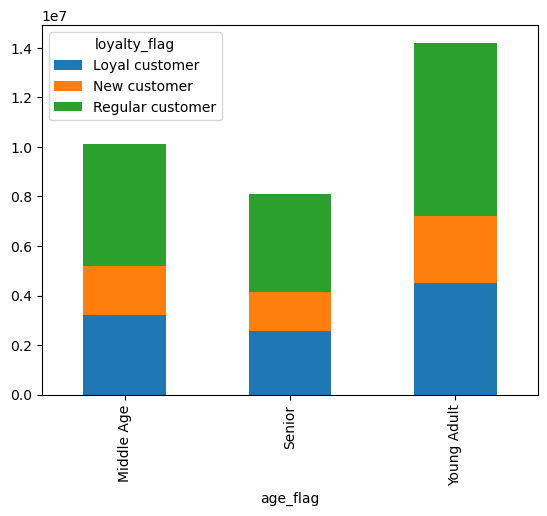

In [75]:
# bar for age and loyalty 
age_loyalty_counts = age_loyalty_counts.plot.bar(stacked=True )

In [76]:
# saving bar for age and loyalty
age_loyalty_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_loyalty.png'))

In [78]:
# grouping marital (family status) and loyalty
marital_loyalty_counts = df_cust_merge.groupby(['fam_status','loyalty_flag']).size().unstack(fill_value=0)

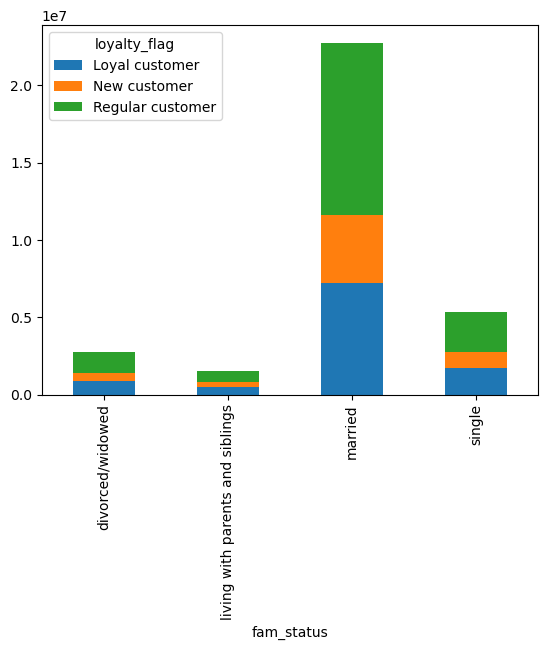

In [79]:
# bar for marital and loyalty
marital_loyalty_counts = marital_loyalty_counts.plot.bar(stacked=True )

In [80]:
# saving bar for marital and loyalty
marital_loyalty_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'marital_loyalty.png'))

# Visualizations for Kids

In [81]:
# making a group/list for kids
kids = [1,2,3]

In [82]:
# making a group/list for no kids
no_kids = [0]

In [85]:
# kids flag (number of departments)
df_cust_merge.loc[df_cust_merge['n_dependants'].isin(kids), 'kids'] = 'has kids'

In [86]:
# kids flag
df_cust_merge.loc[df_cust_merge['n_dependants'].isin(no_kids), 'kids'] = 'no kids'

In [87]:
# checking count
df_cust_merge['kids'].value_counts(dropna = False)

has kids    24329015
no kids      8105197
Name: kids, dtype: int64

In [88]:
df_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_flag,kids
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,No,Young Adult,has kids
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,No,Young Adult,has kids
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,No,Young Adult,has kids
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,No,Young Adult,has kids
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,No,Young Adult,has kids


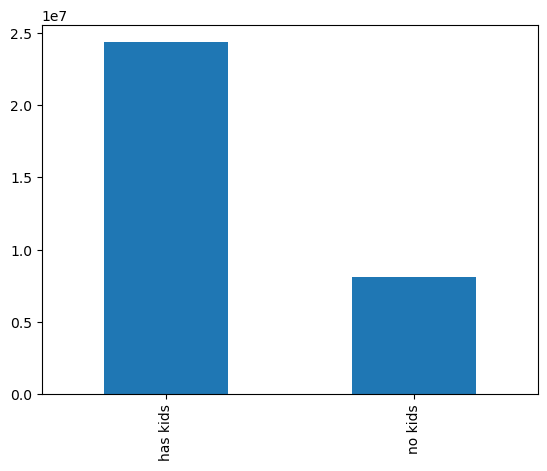

In [89]:
# bar chart showing customers with kids
bar_kids = df_cust_merge['kids'].value_counts().sort_index().plot.bar()

In [90]:
#saving bar for kids
bar_kids.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_kids.png'))

# Income flag

In [91]:
# creating an income  flag
df_cust_merge.loc[df_cust_merge['income']>= 156000,'income_flag'] = 'high income'

In [92]:
# creating an income flag
df_cust_merge.loc[(df_cust_merge['income']<=155999) & (df_cust_merge['income']>=52000),'income_flag'] = 'middle income'

In [93]:
# creating an income  flag
df_cust_merge.loc[df_cust_merge['income'] <52000,'income_flag'] = 'low income'

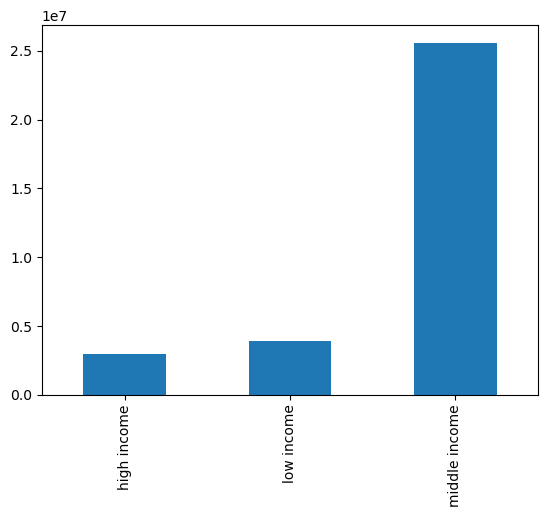

In [94]:
bar_income = df_cust_merge['income_flag'].value_counts().sort_index().plot.bar()

In [95]:
# saving bar for income
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_income.png'))

# Dept Visualizations

In [96]:
# stacked bar chart of dept and age
age_department_counts = df_cust_merge.groupby(['department_id','age_flag']).size().unstack(fill_value=0)

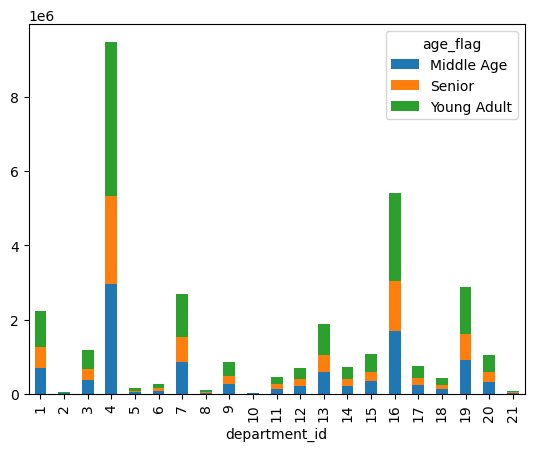

In [97]:
# bar for dept and age
age_department = age_department_counts.plot.bar(stacked=True )

In [98]:
# saving bar for age and dept
age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age_dept.png'))

In [99]:
# stacked bar chart of dept and kids
kid_department_counts = df_cust_merge.groupby(['department_id','kids']).size().unstack(fill_value=0)

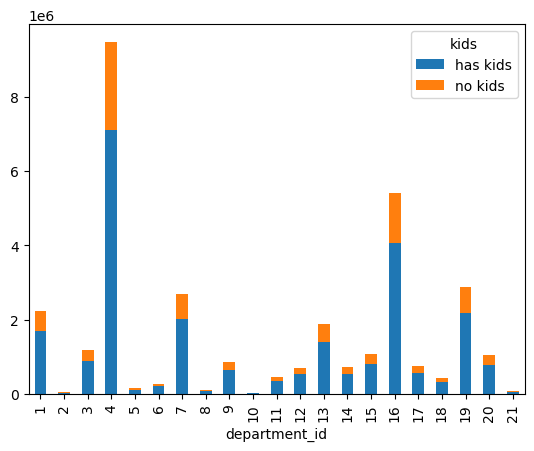

In [100]:
# bar for dept and kids
kid_department = kid_department_counts.plot.bar(stacked=True )

In [101]:
# saving bar for kid and dept
kid_department.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_kid_dept.png'))

In [102]:
# trying to make a stacked bar chart of dept and income
income_department_counts = df_cust_merge.groupby(['department_id','income_flag']).size().unstack(fill_value=0)

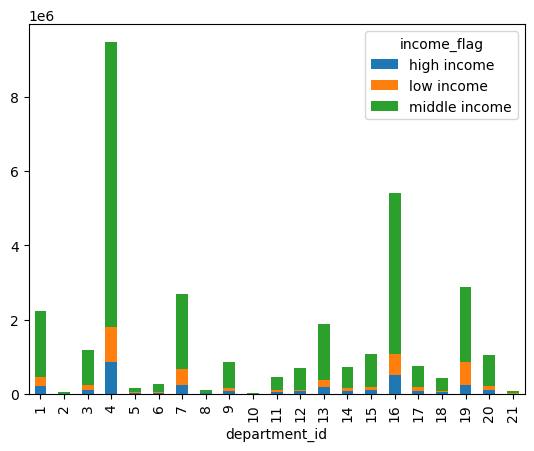

In [103]:
# bar for dept and income
income_department = income_department_counts.plot.bar(stacked=True )

In [104]:
# saving bar for income and dept
income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_income_dept.png'))

# Region Visulizations

In [105]:
# stacked bar chart of region and age
region_age_counts = df_cust_merge.groupby(['region','age_flag']).size().unstack(fill_value=0)

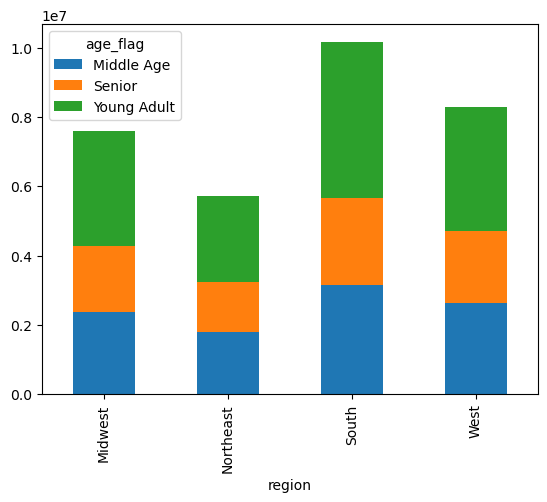

In [106]:
# bar for region and age
region_age = region_age_counts.sort_index().plot.bar(stacked=True )

In [107]:
# saving bar for age and region
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_age.png'))

In [108]:
# stacked bar chart of region and kids
region_kid_counts = df_cust_merge.groupby(['region','kids']).size().unstack(fill_value=0)

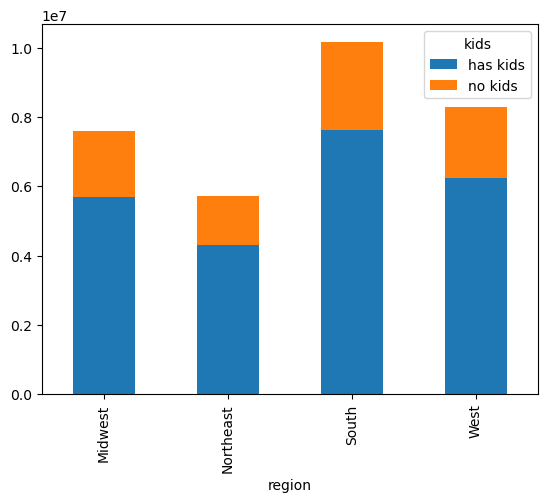

In [109]:
# bar for region and kids
region_kid = region_kid_counts.plot.bar(stacked=True )

In [110]:
# saving bar for age and region
region_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_kid.png'))

In [111]:
# stacked bar chart of region and income
region_income_counts = df_cust_merge.groupby(['region','income_flag']).size().unstack(fill_value=0)

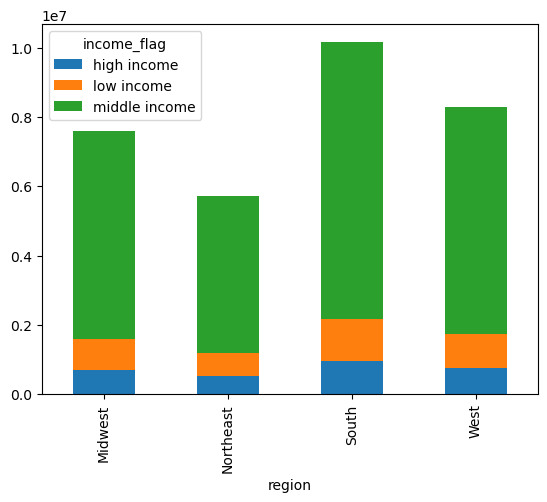

In [112]:
# bar for region and income
region_income = region_income_counts.plot.bar(stacked=True )

In [113]:
# saving bar for income and region
region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_income.png'))

In [115]:
# stacked bar chart of region and marital_status
region_marital_counts = df_cust_merge.groupby(['region','fam_status']).size().unstack(fill_value=0)

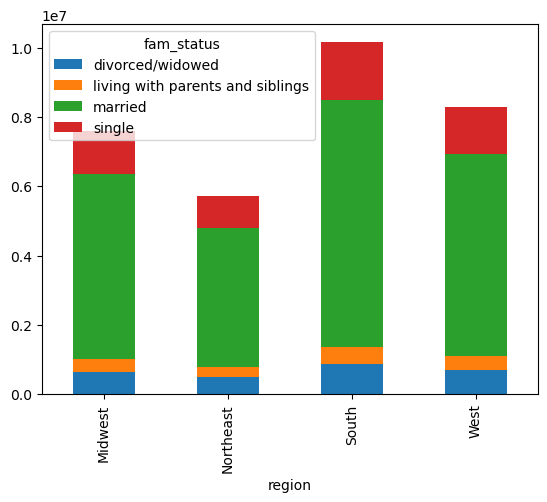

In [116]:
# bar for region and marital status
region_marital = region_marital_counts.plot.bar(stacked=True )

In [117]:
# saving bar for marital and region
region_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_marital.png'))

In [119]:
# stacked bar chart of dept and marital_status
dept_marital_counts = df_cust_merge.groupby(['department_id','fam_status']).size().unstack(fill_value=0)

# marital status

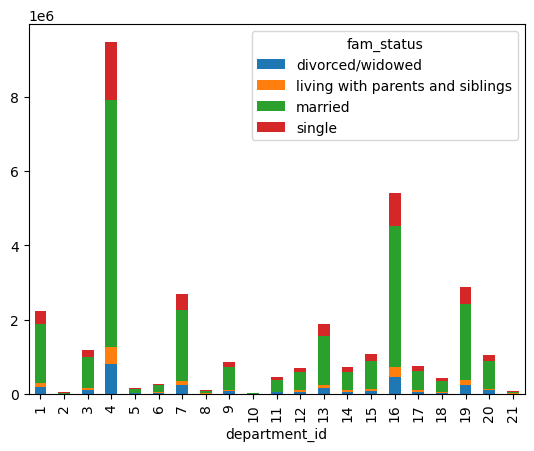

In [120]:
# bar for dept and marital status
dept_marital = dept_marital_counts.plot.bar(stacked=True )

In [121]:
# saving bar for marital and dept
dept_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dept_marital.png'))

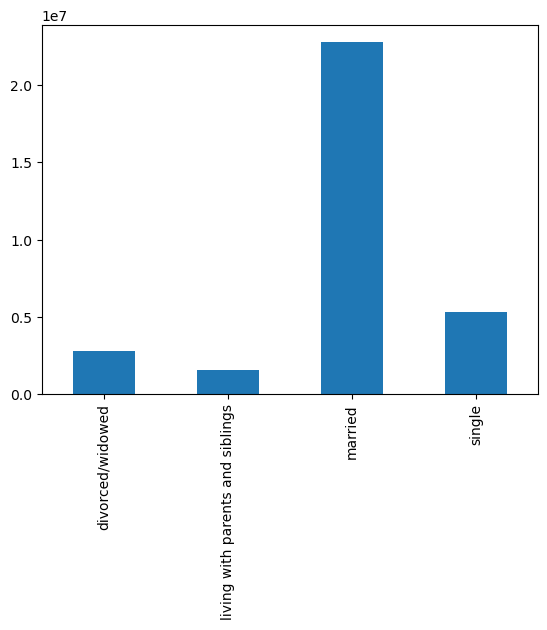

In [122]:
# bar chart for marital status
bar_marital = df_cust_merge['fam_status'].value_counts().sort_index().plot.bar()

In [123]:
# saving bar for marital 
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_marital.png'))

# Spending and age

In [124]:
# stacked bar chart of spending_flag and age
spending_age_counts = df_cust_merge.groupby(['age_flag','spending_flag']).size().unstack(fill_value=0)

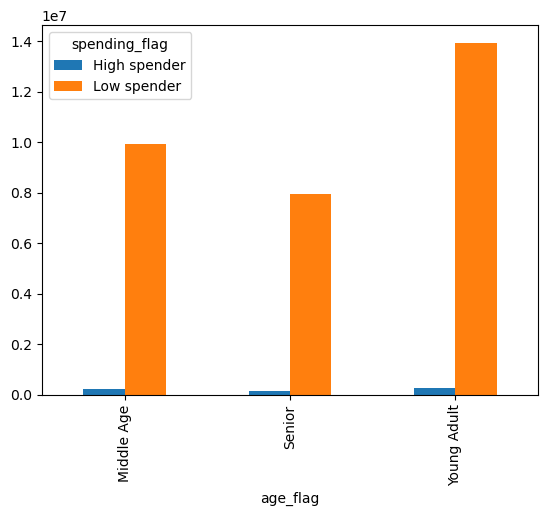

In [125]:
# trying to make a stacked bar chart of spending and age

spending_age = spending_age_counts.plot.bar(stacked=False )

In [126]:
# saving bar for marital 
spending_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_marital.png'))

# Day of week visualizations

In [128]:
# stacked bar chart of dow (day of week) and age
dow_age_counts = df_cust_merge.groupby(['order_dow','age_flag']).size().unstack(fill_value=0)

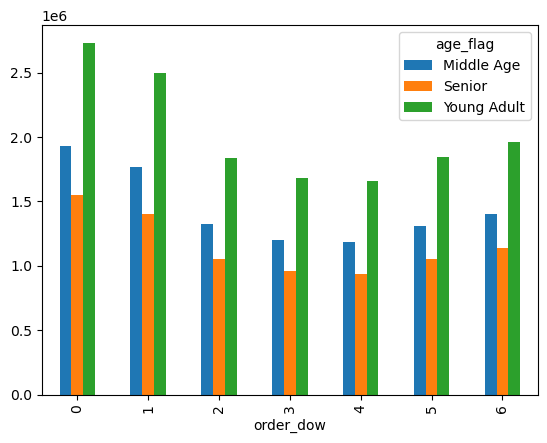

In [129]:
# bar chart for dow and age
dow_age = dow_age_counts.plot.bar(stacked=False )

In [130]:
# saving bar for dow and age
dow_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dow_age.png'))

In [131]:
# stacked bar chart of dow and marital
dow_marital_counts =  df_cust_merge.groupby(['order_dow','fam_status']).size().unstack(fill_value=0)

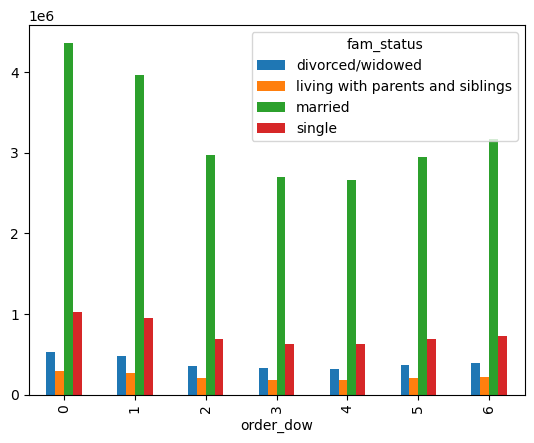

In [132]:
# bar chart for dow and age
dow_marital = dow_marital_counts.plot.bar(stacked=False )

In [134]:
# saving bar for dow and marital
dow_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dow_marital.png'))

In [136]:
# stacked bar chart of dow and kids
dow_kid_counts = df_cust_merge.groupby(['order_dow','kids']).size().unstack(fill_value=0)

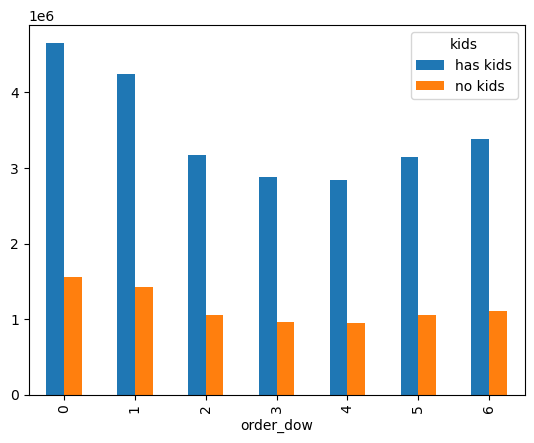

In [137]:
# bar chart for dow and kids
dow_kid = dow_kid_counts.plot.bar(stacked=False )

In [138]:
# saving bar for dow and kids
dow_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dow_kid.png'))

In [139]:
# stacked bar chart of dow and income
dow_income_counts = df_cust_merge.groupby(['order_dow','income_flag']).size().unstack(fill_value=0)

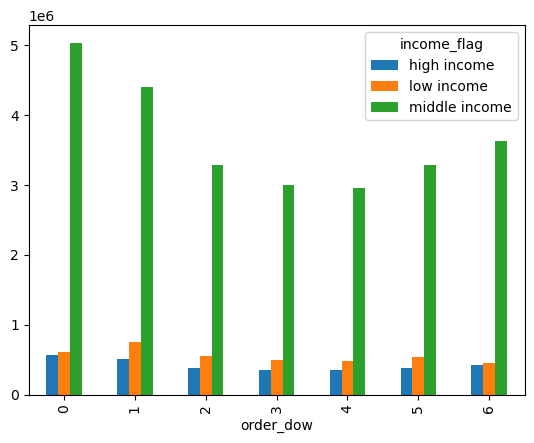

In [140]:
# bar chart for dow and income
dow_income = dow_income_counts.plot.bar(stacked=False )

In [141]:
# saving bar for dow and income
dow_income.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dow_income.png'))

# Aggregations

In [145]:
# agregate the max, mean, and min variables on a user level for usage frequency and expenditure.

aggregations= df_cust_merge.groupby('user_id').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']}).reset_index()

In [146]:
aggregations.head(10)

user_id days_since_prior_order                  prices                
                             min   max       mean    min   max      mean
0       1                    0.0  30.0  20.259259    1.0  14.0  6.367797
1       2                    3.0  30.0  15.967033    1.3  14.8  7.515897
2       3                    7.0  21.0  11.487179    1.3  14.4  8.197727
3       4                    0.0  21.0  15.357143    1.4  14.6  8.205556
4       5                   10.0  19.0  14.500000    3.2  14.8  9.189189
5       6                    6.0  12.0   7.800000    1.8  19.6  8.471429
6       7                    2.0  30.0  13.546392    1.1  23.2  7.466990
7       8                   30.0  30.0  30.000000    1.1  14.4  8.781633
8       9                    6.0  30.0  24.260870    1.2  19.3  7.607895
9      10                   12.0  30.0  20.746377    1.0  24.2  8.651049

# Gender visualization

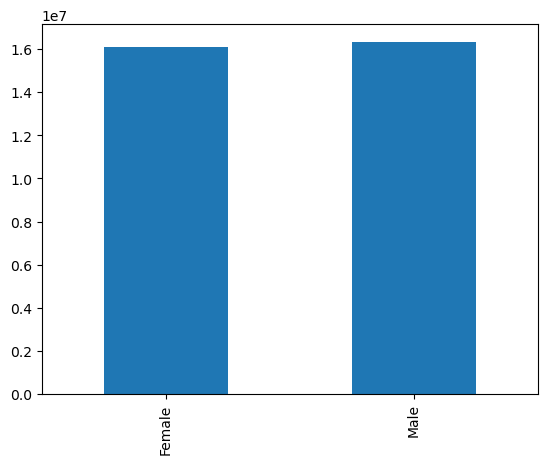

In [148]:
# bar chart for gender
bar_gender = df_cust_merge['Gender'].value_counts().sort_index().plot.bar()

In [149]:
#saving bar for gender
bar_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_gender.png'))

In [151]:
#checking count
df_cust_merge['Gender'].value_counts(dropna = False)

Male      16329623
Female    16104589
Name: Gender, dtype: int64

# Frequency Visulizations

In [153]:
# stacked bar chart of frequency and age
freq_age = df_cust_merge.groupby(['order_frequency_flag','age_flag']).size().unstack(fill_value=0)

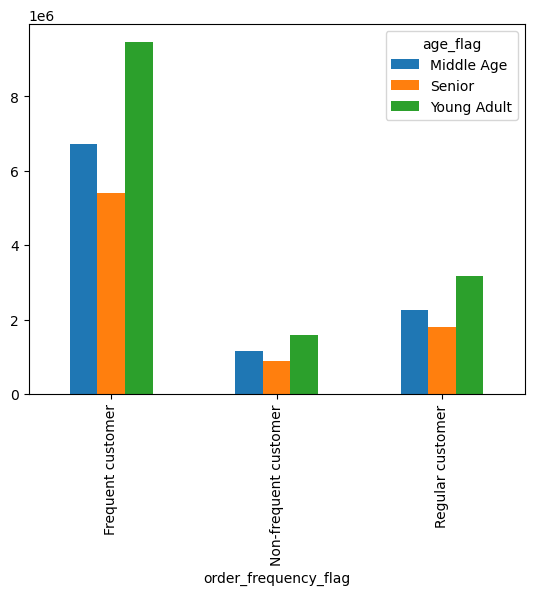

In [154]:
# bar chart for freq and age
freq_age = freq_age.plot.bar(stacked=False )

In [155]:
#saving bar for freq and age
freq_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_freq_age.png'))

In [157]:
# stacked bar chart of frequency and kids
freq_kid = df_cust_merge.groupby(['order_frequency_flag','kids']).size().unstack(fill_value=0)

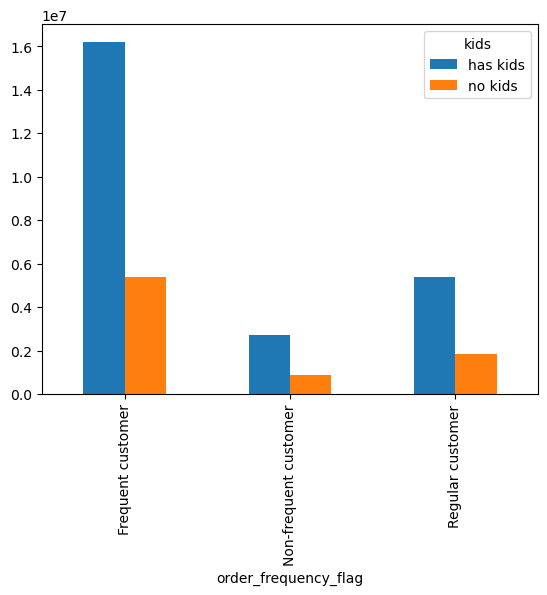

In [158]:
#bar chart for freq and kid
freq_kid = freq_kid.plot.bar(stacked=False )

In [159]:
#saving bar for freq and kid
freq_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_freq_kid.png'))

In [160]:
# stacked bar chart of frequency and income
freq_income = df_cust_merge.groupby(['order_frequency_flag','income_flag']).size().unstack(fill_value=0)

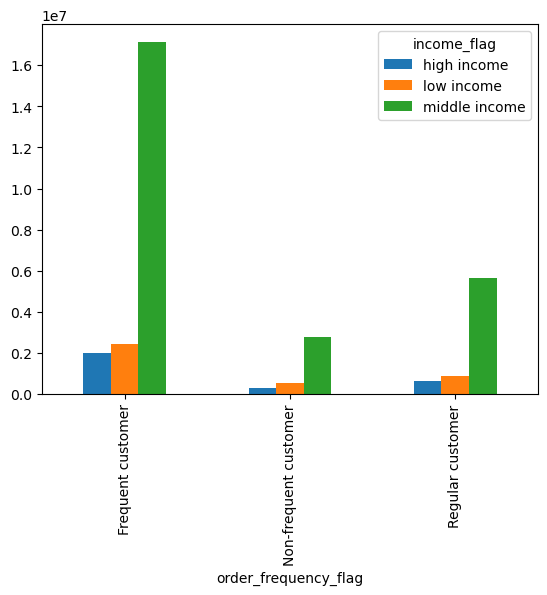

In [161]:
#bar chart for freq and income
freq_income = freq_income.plot.bar(stacked=False )

In [162]:
#saving bar for freq and kid
freq_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_freq_kid.png'))

In [164]:
# export data to pkl

df_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all_task_4_10.pkl'))